In [1]:
import pandas as pd
from ast import literal_eval
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
train = pd.read_csv('/content/drive/MyDrive/11기 CP2 프로젝트/train2.csv', converters = {'token' : literal_eval})
train

,token,label
0,"[김, 다나, 디자인, 기자, 남, 이야기, 를, 듣, 지, 않, 고, 라, 떼, ...",0
1,"[환, 위험, 모니터링, AI, 솔루션, 등, 포함, 9, 일, 서울, 강남구, 트...",0
2,"[국제선, 여객, 수요, 늘어나, 었, 지만, 코로나, 이전, 수준, 회복, 까지,...",0
3,"[한솔, 제지, 내수, 시장, 점유율, 37, 8, 에서, 45, 5, 까, 지, ...",0
4,"[소비재, 지수, 이달, 7, 하락, 실적, 대비, 주가, 하락폭, 커, 어, 최근...",1
...,...,...
89290,"[최, 태원, 대한, 상공, 회의, 소, 회장, 이, 24, 일, 오전, 상의, 국...",0
89291,"[미래, 에, 셋, 증권, 은, 인공지능, 기반, 핀, 테크, 스타트, 업, 크래프...",1
89292,"[이강, 민, 데이, 원, 컴퍼니, 대표, 최신, 화, 콘텐츠, 중점, 수업, 15...",1
89293,"[청약, 통장, 없이, 만, 19, 세, 이상, 누구, 나, 청약, 신청, 가능, ...",1


In [3]:
from tqdm import tqdm
def stopword(x):
  stopword = [r'상승.*', r'하락.*', r'급등.*', r'급락.*',
              '상승세', '하락세', '폭등', '폭락', '오름세',
              '약세', '강세', '의', '가', '이', '은', '들',
              '는', '좀', '잘', '걍', '과', '도', '를', '으로',
              '자', '에', '와', '한', '하다', '에', '은', '는', '하']
  return [i for i in x if i not in stopword and not i.isdigit()]

tqdm.pandas()
train["token"] = train.token.progress_apply(stopword)
train

100%|██████████| 89295/89295 [00:37<00:00, 2363.54it/s]


,token,label
0,"[김, 다나, 디자인, 기자, 남, 이야기, 듣, 지, 않, 고, 라, 떼, 만, ...",0
1,"[환, 위험, 모니터링, AI, 솔루션, 등, 포함, 일, 서울, 강남구, 트레이드...",0
2,"[국제선, 여객, 수요, 늘어나, 었, 지만, 코로나, 이전, 수준, 회복, 까지,...",0
3,"[한솔, 제지, 내수, 시장, 점유율, 에서, 까, 지, 분기, 해상, 운임, 료,...",0
4,"[소비재, 지수, 이달, 하락, 실적, 대비, 주가, 하락폭, 커, 어, 최근, 중...",1
...,...,...
89290,"[최, 태원, 대한, 상공, 회의, 소, 회장, 일, 오전, 상의, 국제, 회의장,...",0
89291,"[미래, 셋, 증권, 인공지능, 기반, 핀, 테크, 스타트, 업, 크래프트, 테크놀...",1
89292,"[이강, 민, 데이, 원, 컴퍼니, 대표, 최신, 화, 콘텐츠, 중점, 수업, 명,...",1
89293,"[청약, 통장, 없이, 만, 세, 이상, 누구, 나, 청약, 신청, 가능, 내, 집...",1


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [8]:
x_train = []

for i in range(0, int(len(train['token'][:75000]))):
    x_train.append(train['token'][i])

In [9]:
x_test = []

for i in range(0, len(train['token'][75000:])):
    x_test.append(train['token'][i])

In [10]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

In [11]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 61658
등장 빈도가 2번 이하인 희귀 단어의 수: 16655
단어 집합에서 희귀 단어의 비율: 27.011904375750106
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.06292701445900943


In [12]:
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 45004


In [13]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [14]:
print(x_train[0])

[149, 7770, 830, 546, 797, 2621, 337, 20, 91, 6, 110, 3014, 17, 755, 2621, 25, 14127, 11, 24435, 30, 8, 360, 375, 1727, 47, 61, 133, 165, 2767, 2173, 1210, 507, 2466, 2709, 3, 26309, 4, 1, 47, 61, 3, 1000, 8541, 96, 11, 9084, 3127, 112, 1250, 6589, 1312, 1733, 1768, 2926, 338, 217, 3224, 3, 2292, 46, 1, 85, 1348, 507, 11, 732, 51, 6338, 1551, 6589, 13582, 728, 2, 168, 103, 6, 9, 116, 178, 15, 18, 85, 33, 28, 375, 133, 104, 14127, 12, 2829, 5, 89, 25, 338, 711, 3, 1451, 165, 2767, 2173, 3, 217, 4245, 11, 2292, 4, 1, 6375, 912, 3, 260, 5, 908, 2587, 1154, 6, 1456, 578, 153, 3875, 13, 1197, 11745, 451, 25, 923, 1132, 162, 216, 1477, 1, 375, 133, 52, 710, 1111, 25, 8104, 8340, 5, 9, 2347, 25, 1935, 1211, 49, 5, 2015, 205, 1687, 3, 1451, 4, 1, 1210, 507, 459, 3, 1178, 1733, 1312, 2942, 1001, 13, 1768, 857, 2950, 15, 3940, 64, 263, 2, 375, 133, 68, 2, 26, 47, 734, 1121, 32, 10697, 17, 89, 1118, 503, 10698, 152, 1312, 3, 180, 1, 23, 392, 1434, 412, 11, 8210, 5, 1362, 1057, 6, 4, 1, 68, 2, 26,

In [15]:
x_train = np.array(x_train)
x_test = np.array(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [16]:
y_train = np.array(train['label'][:75000])
y_test = np.array(train['label'][75000:])

In [17]:
drop_train = [index for index, sentence in enumerate(x_train) if len(sentence) < 1]

In [18]:
x_train = np.delete(x_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(x_train))
print(len(y_train))

75000
75000


In [19]:
print(len(x_test))
print(len(y_test))

14295
14295


In [20]:
print(max(len(sentence) for sentence in x_train))
print(sum(map(len, x_train)) / len(x_train))

4572
489.69848


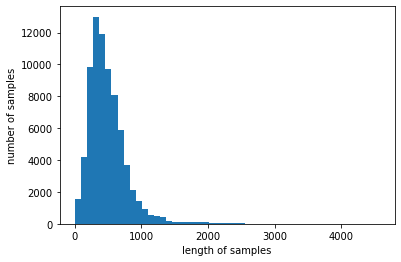

In [21]:
plt.hist([len(sentence) for sentence in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [22]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators = 1000, learning_rate = 0.2, max_depth = 5)
model.fit(x_train, y_train)

IndexError: ignored

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(x_test)
accuracy_score(y_pred, y_test)

In [ ]:
def below_threshold_len(max_len, nested_list):
    count = 0
    for sentence in nested_list:
        if(len(sentence) <= max_len):
            count = count + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [ ]:
max_len = 2000
below_threshold_len(max_len, x_train)

전체 샘플 중 길이가 2000 이하인 샘플의 비율: 99.524


In [ ]:
x_train = pad_sequences(x_train, maxlen = max_len)
x_test = pad_sequences(x_test, maxlen = max_len)

In [ ]:
y_train.shape, y_test.shape

((75000,), (14295,))

In [ ]:
from tensorflow.keras.layers import Embedding, Dense
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dropout, Conv2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
embedding_dim = max_len # 임베딩 벡터의 차원
dropout_ratio = 0.4 # 드롭아웃 비율
num_filters = 3 # 커널의 수
kernel_size = 3 # 커널의 크기
hidden_units = 128 # 뉴런의 수

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Dropout(dropout_ratio))
model.add(Conv1D(num_filters, kernel_size, padding = 'valid', activation = 'relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_units, activation='relu'))
model.add(Dropout(dropout_ratio))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 4)
mc = ModelCheckpoint('/content/drive/MyDrive/11기 CP2 프로젝트/TextCNN_best_model.h5', monitor = 'val_acc', mode = 'max', verbose = 1, save_best_only = True)

In [ ]:
from tensorflow import keras
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=keras.optimizers.Adam(), loss='binary_crossentropy', metrics = ['acc'])
history = model.fit(x_train, y_train, epochs=20, validation_data = [x_test, y_test], callbacks=[es, mc])

Epoch 1/20
2344/2344 [==============================] - ETA: 0s - loss: 0.6916 - acc: 0.5252
Epoch 1: val_acc did not improve from 0.53040
2344/2344 [==============================] - 293s 125ms/step - loss: 0.6916 - acc: 0.5252 - val_loss: 0.6971 - val_acc: 0.5165
Epoch 2/20
2344/2344 [==============================] - ETA: 0s - loss: 0.6743 - acc: 0.5783
Epoch 2: val_acc did not improve from 0.53040
2344/2344 [==============================] - 288s 123ms/step - loss: 0.6743 - acc: 0.5783 - val_loss: 0.7195 - val_acc: 0.5008
Epoch 3/20
2344/2344 [==============================] - ETA: 0s - loss: 0.6390 - acc: 0.6343
Epoch 3: val_acc did not improve from 0.53040
2344/2344 [==============================] - 292s 124ms/step - loss: 0.6390 - acc: 0.6343 - val_loss: 0.7573 - val_acc: 0.5099
Epoch 4/20
2344/2344 [==============================] - ETA: 0s - loss: 0.5988 - acc: 0.6809
Epoch 4: val_acc did not improve from 0.53040
2344/2344 [==============================] - 288s 123ms/step - 

In [ ]:
model.save('TextCNN_best_model.h5')